In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


Our prospective student decides to focus on 2025 rankings, international research network, and employment prospects to help narrow where to apply to school. Using this as our guiding questions, we begin to explore the data.

What country produces the most universities in the top 100 ranked universities?

Note: I'm having trouble subsetting this to top ranked universities (rank under 100)

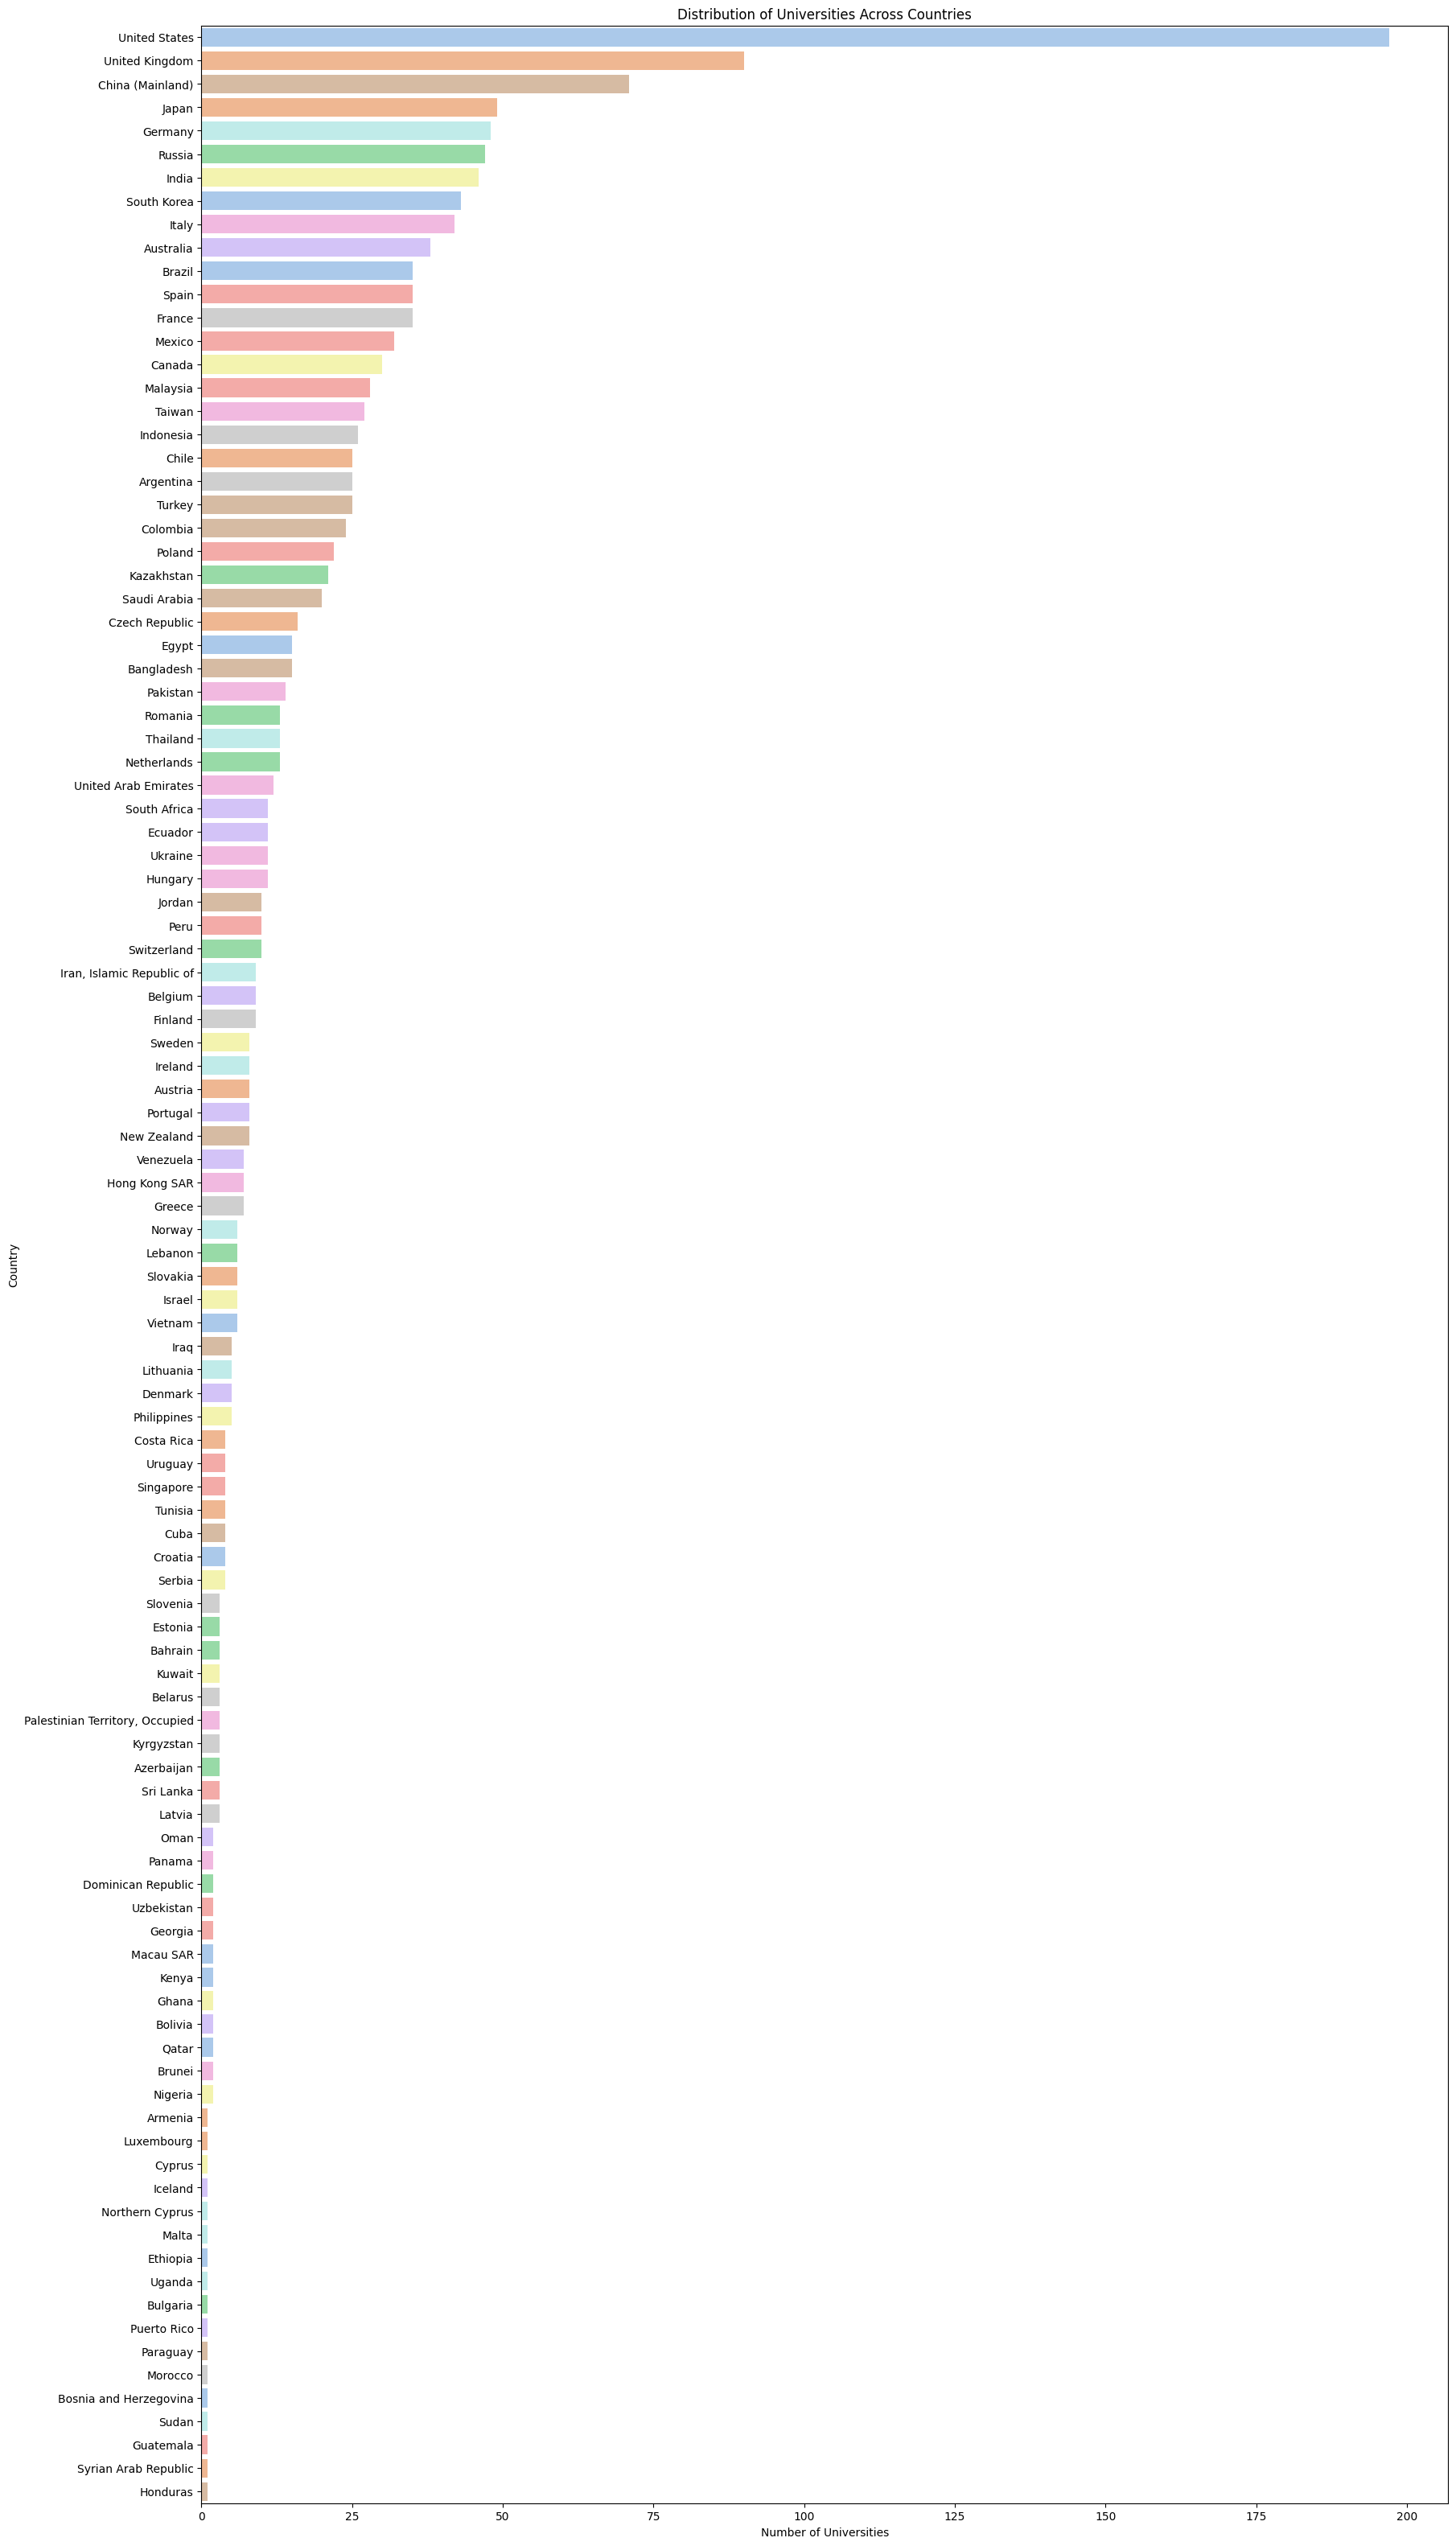

In [77]:
fig, ax = plt.subplots(figsize=(20, 40))
sns.countplot(data=df, y='location_full', order=df.location_full.value_counts().index, palette="pastel", hue="location_full")
plt.xlabel('Number of Universities')
plt.ylabel('Country')
plt.title("Distribution of Universities Across Countries")
plt.show()

Does the country you go to college in influence your career prospects?

The US has slightly better career prospects

Note: I would like to relabel the true and false values

In [ ]:
df['is_us'] = df['location_full'] == 'United States'
df['location_full'] = df['location_full'].where(~df['is_us'], other=df['location_full'])
plt.xlabel('Number of Universities')
plt.show()

<Axes: xlabel='is_us', ylabel='employment_outcomes'>

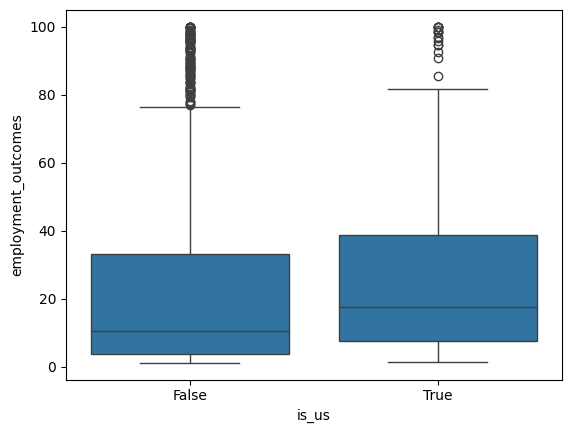

In [ ]:
sns.boxplot(data=df, x="is_us", y="employment_outcomes")

Does institution size influence international research networks or employment outcomes?

In general, the larger the institution, the better employment prospects and larger research network.

<Axes: xlabel='international_research_network'>

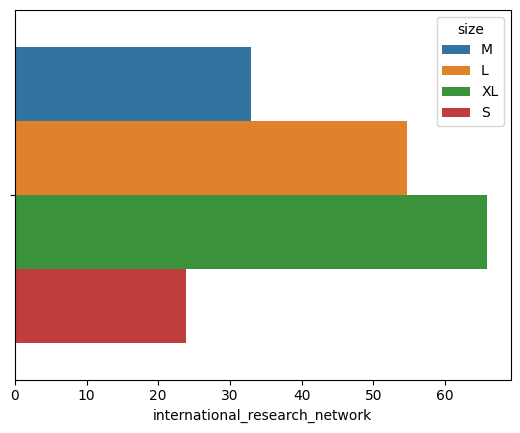

In [ ]:
sns.barplot(data=df,
 x= "international_research_network", hue="size", ci=None)

<Axes: xlabel='employment_outcomes', ylabel='size'>

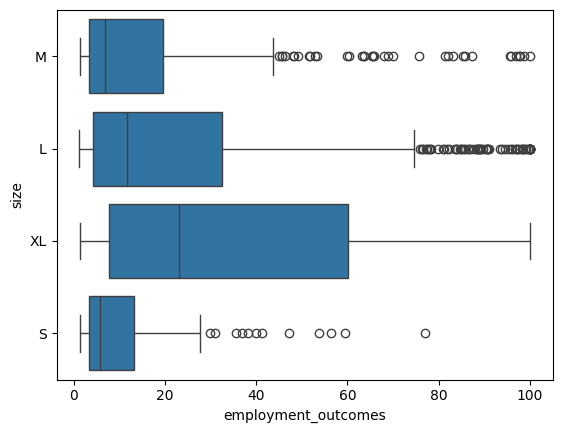

In [ ]:
sns.boxplot(data=df,
    x="employment_outcomes",
 y= "size")

Given this information, our prospective student decides to focus on larger universities in the US with UCB, Columbia, and NYU as top picks

Note: I would like to subset the data to US, XL universities but don't see a straightforward way other than filtering in Excel then re-reading. Is there another method? I would also like to sort the graphs based on scores for easier reading

<Axes: xlabel='employment_outcomes', ylabel='institution_name'>

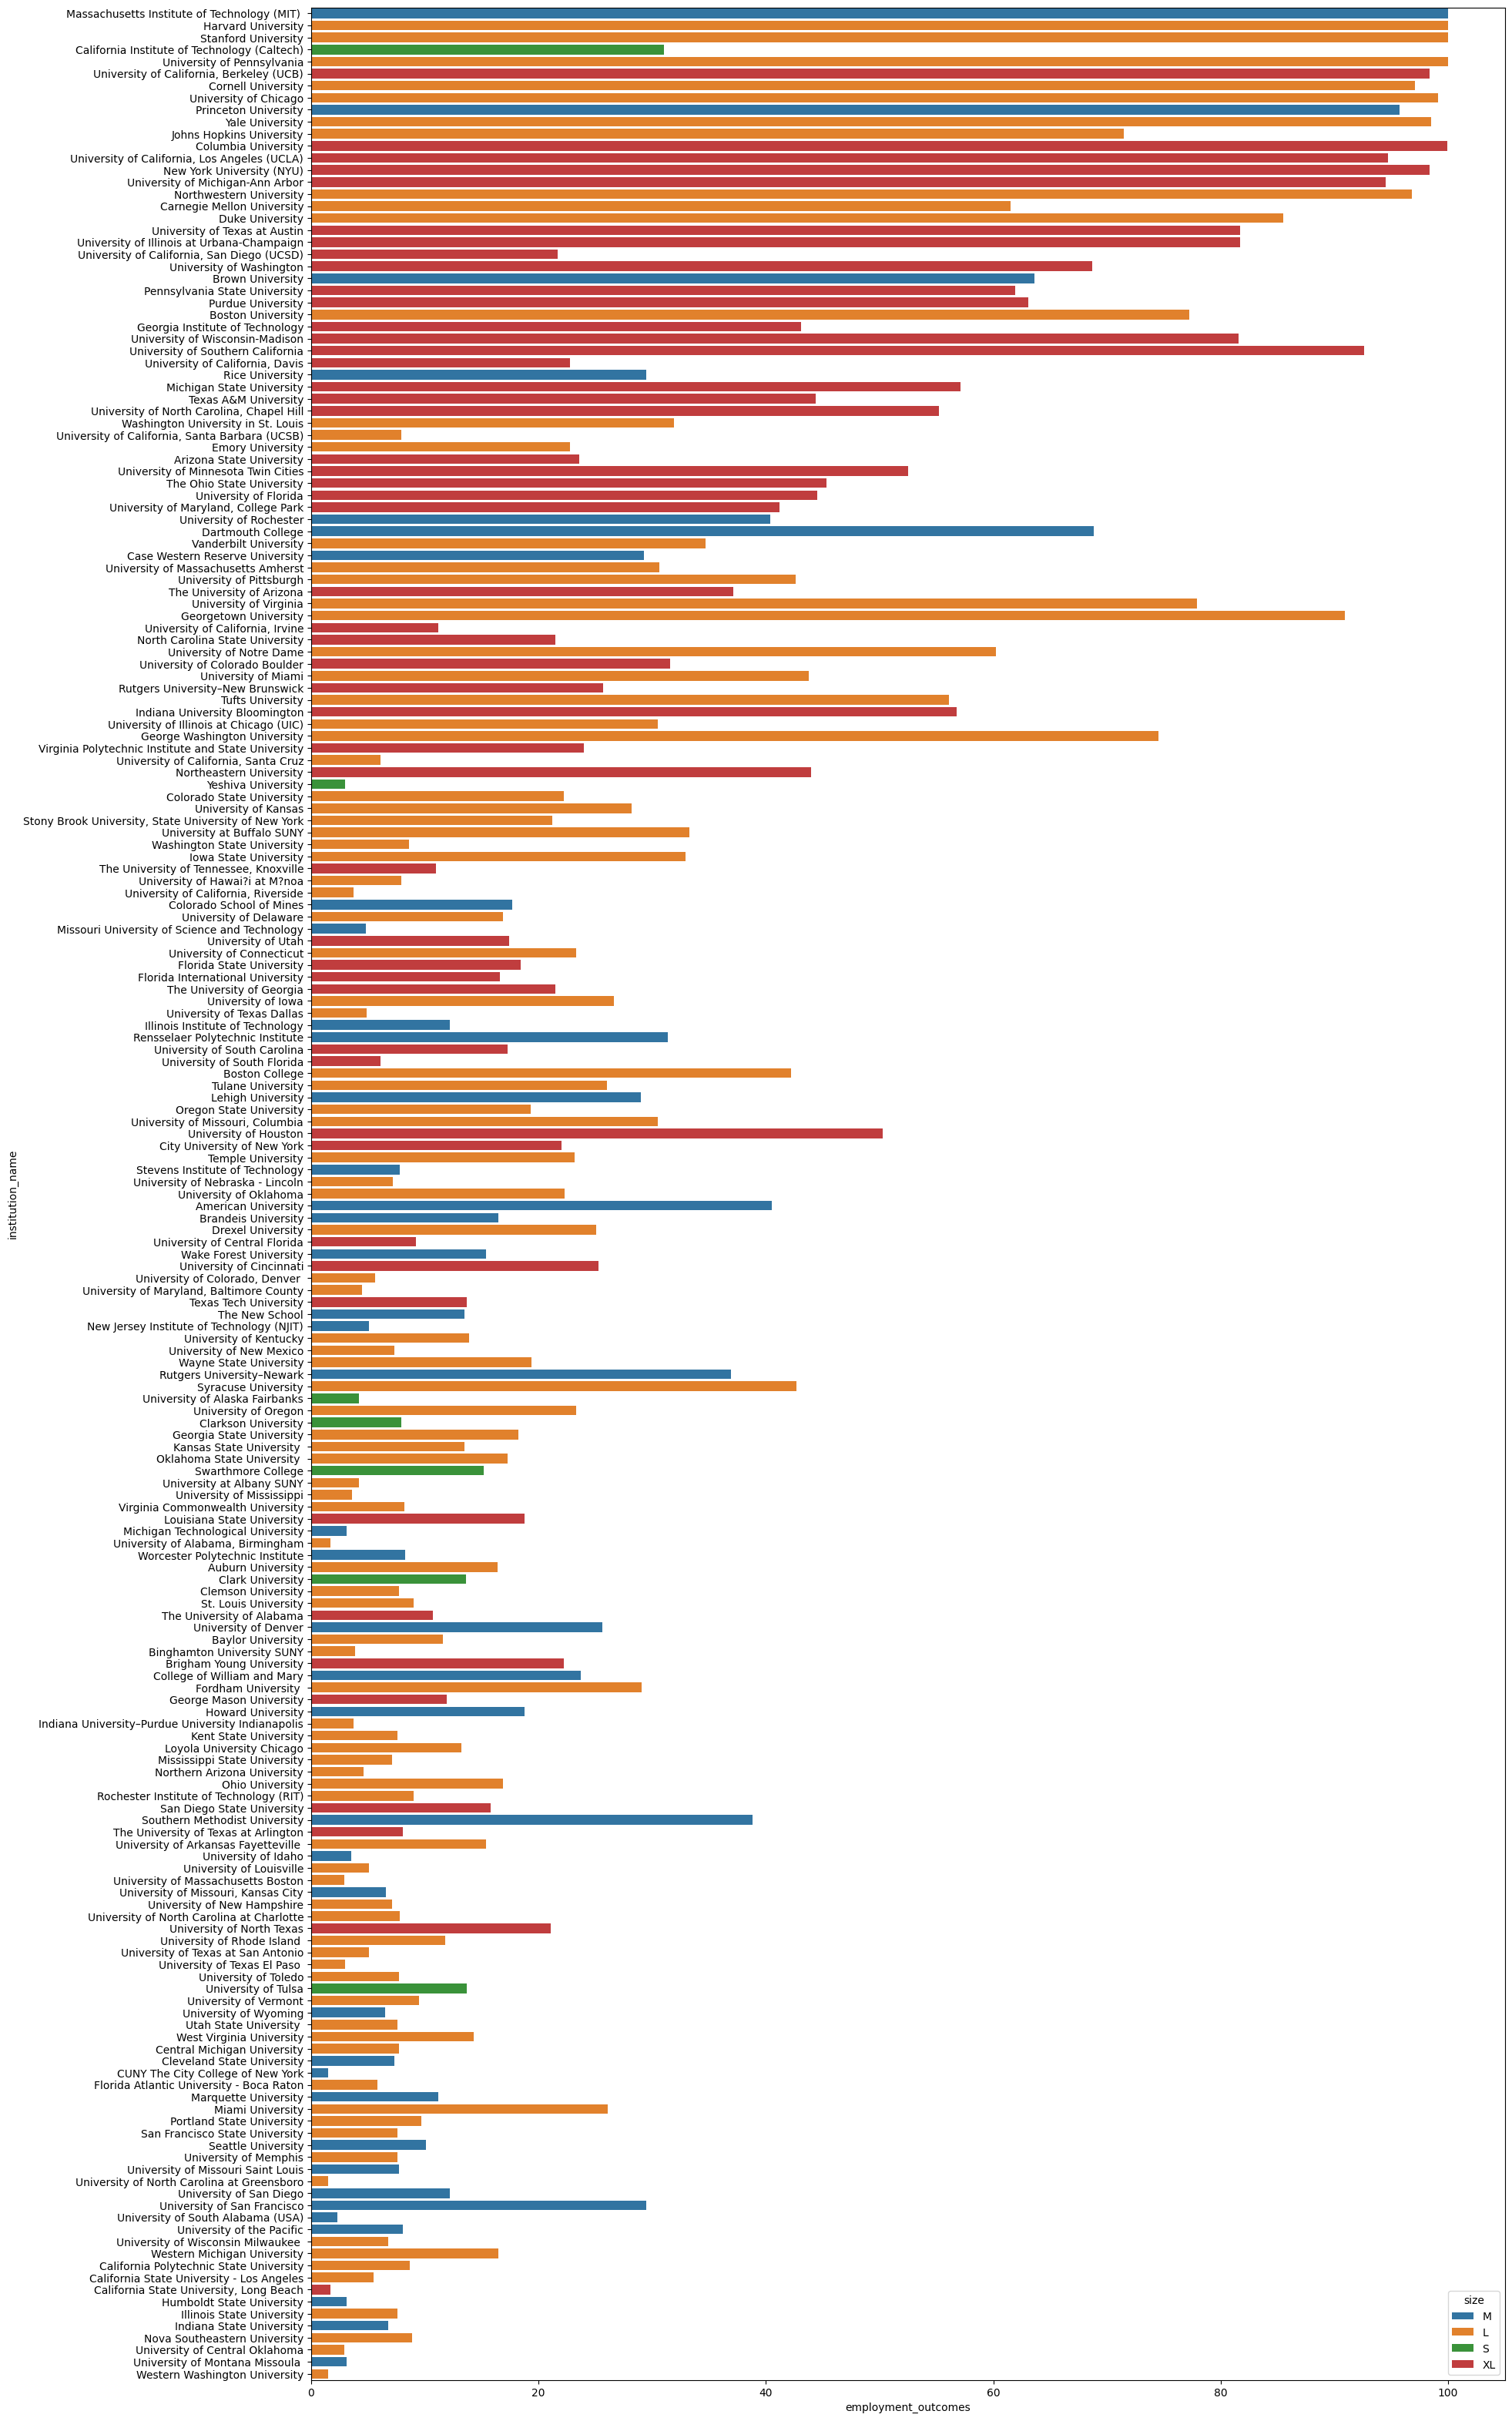

In [85]:
fig, ax = plt.subplots(figsize=(20, 40))

sns.barplot(data=df[df.is_us==True], x="employment_outcomes", y="institution_name", hue="size")


<Axes: xlabel='international_research_network', ylabel='institution_name'>

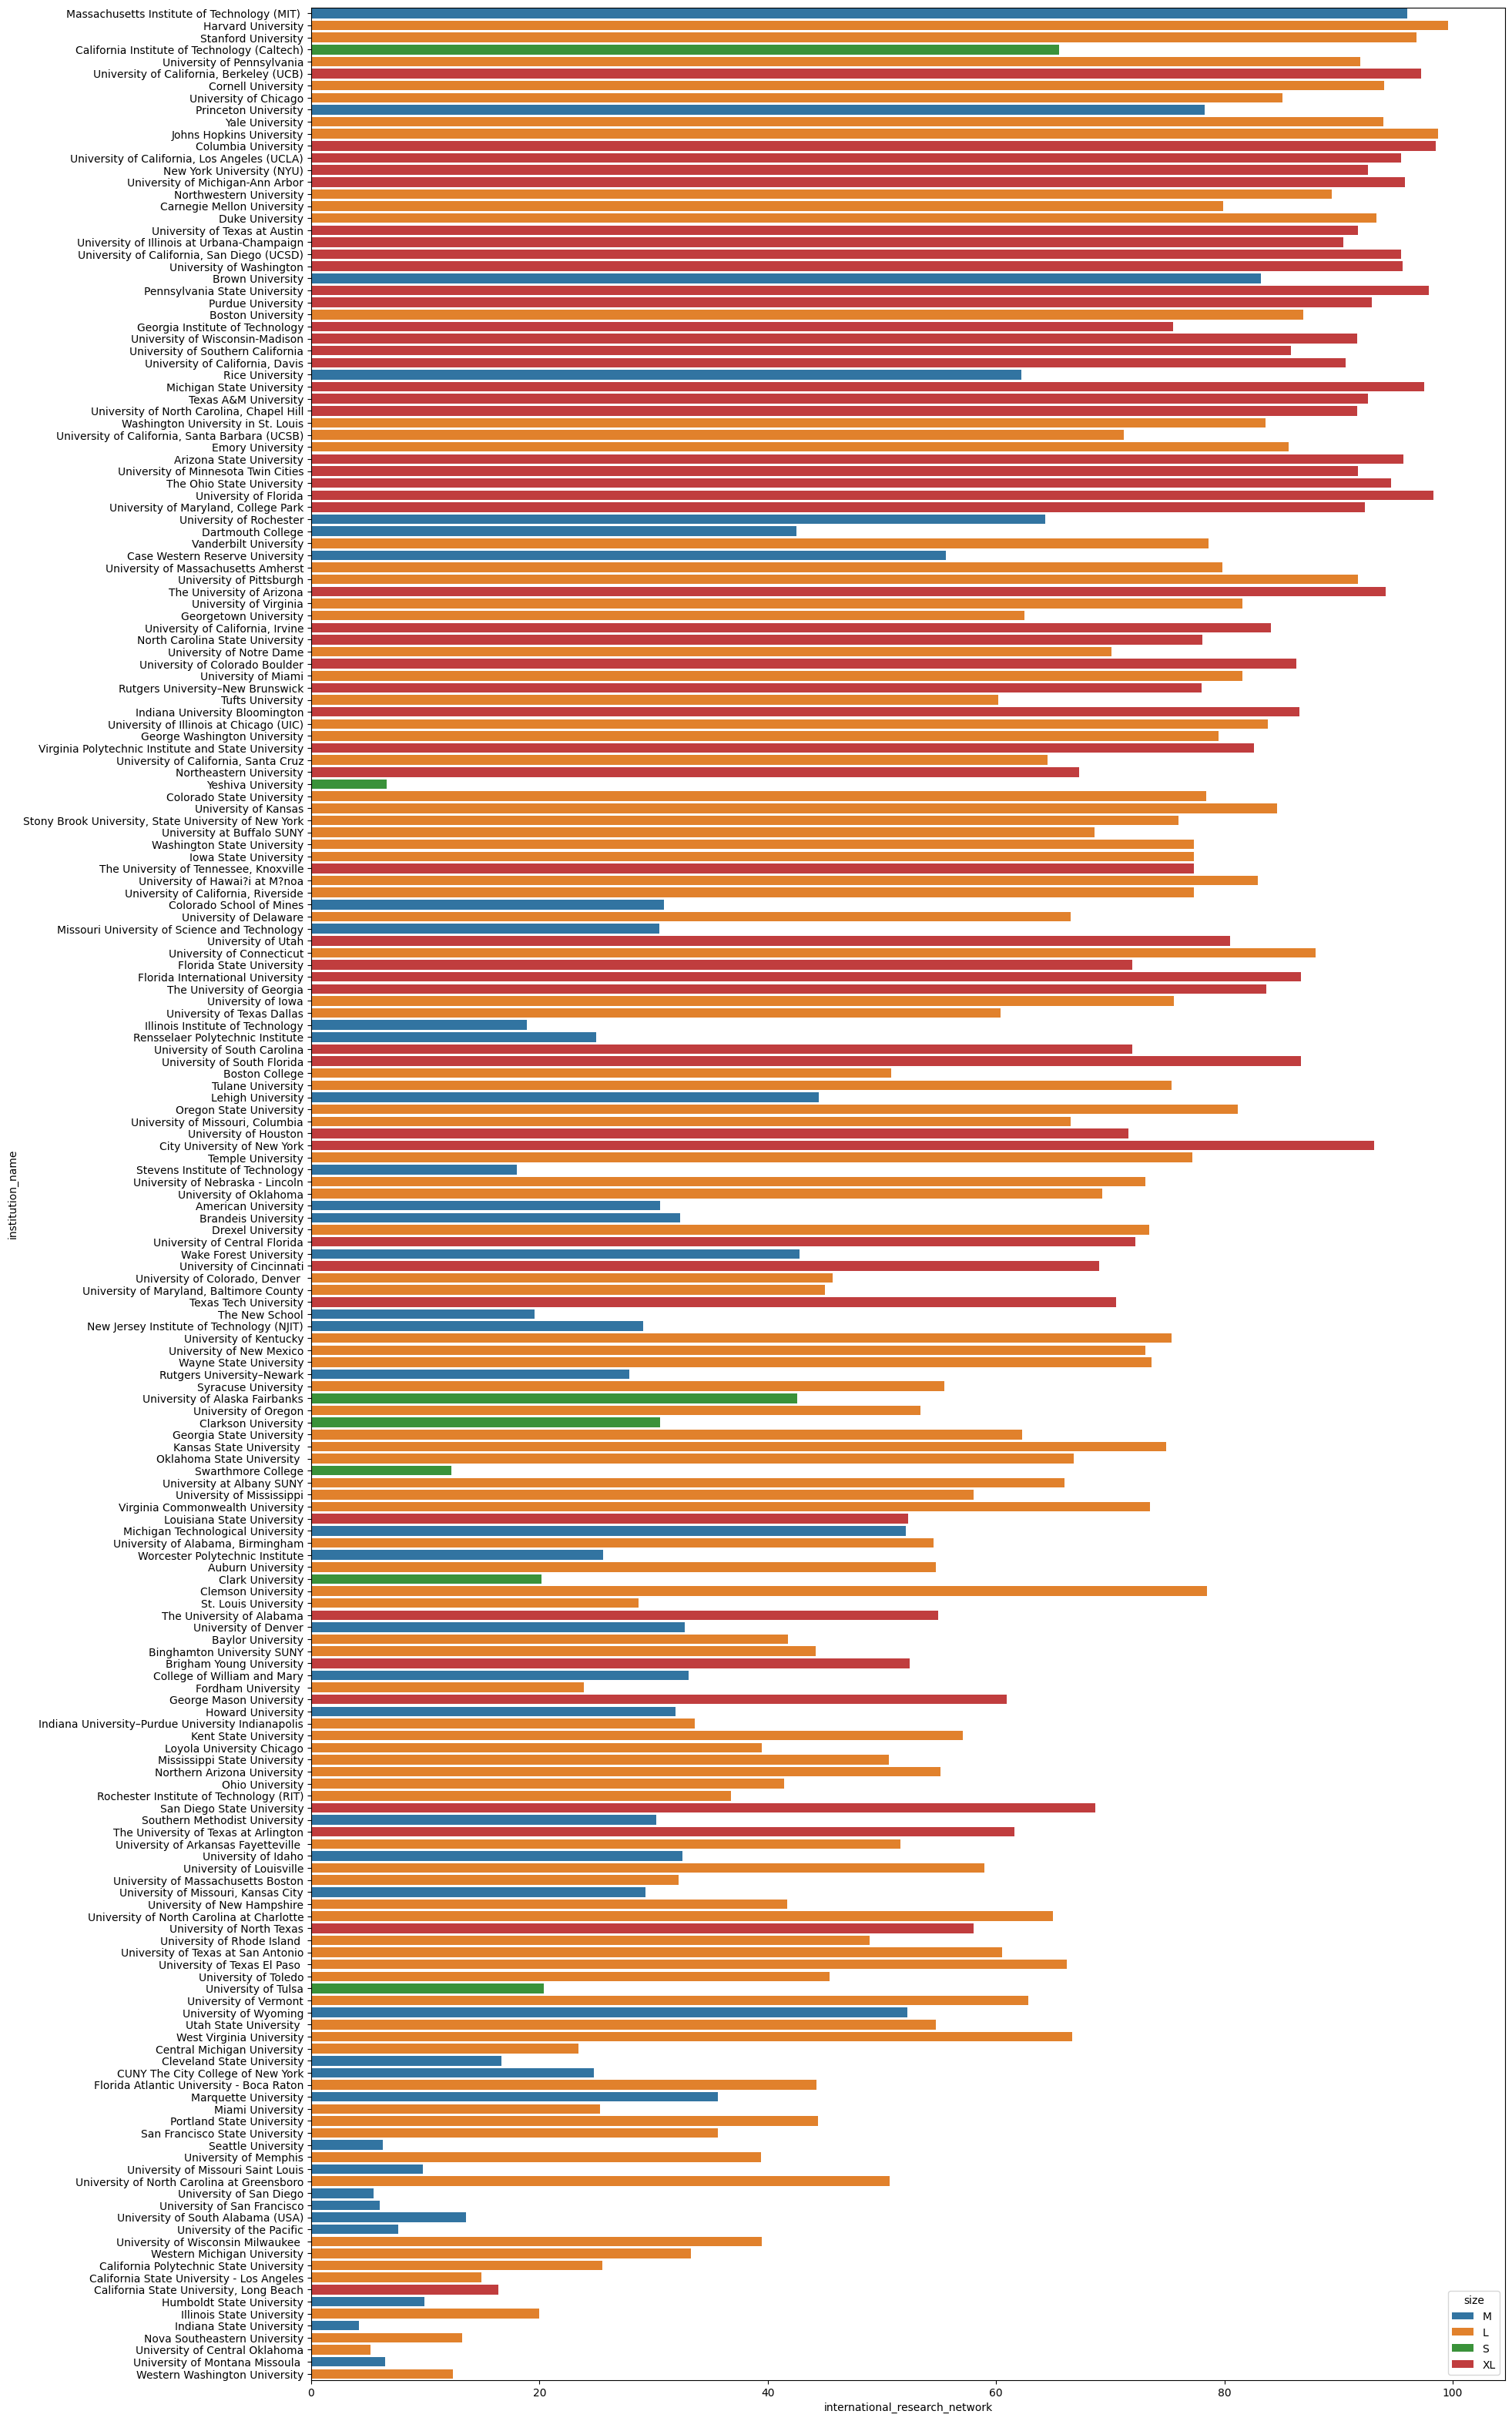

In [92]:
fig, ax = plt.subplots(figsize=(20, 40))

sns.barplot(data=df[df.is_us==True], x="international_research_network", y="institution_name", hue="size")